# 2016

In [1]:
%load_ext watermark
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO, WeekdayLocator
from IPython.display import Markdown as md
import datetime as dt

In [2]:
# filter variables
year = ["2016"]
categories = ["Bioindicator", "Coliform", "Other"]
label_colors = {"Bioindicator":"dodgerblue", "Coliform":"magenta"}
locations = ["SVT", "VNX", "MRD"]
date_range = ["2016-07-01", "2016-07-16"]
date_range_dt = (dt.date(2016, 7, 1), dt.date(2016, 7, 16))


y = "per/100ml"

new_sd = pd.read_csv("data/end/2016_2023_MRD_VNX_SVT.csv")
new_rd = pd.read_csv("data/end/rain_data_2016.csv")

date_format = mdates.DateFormatter('%m-%d')

# data formatting
from yearly_summaries import report_data, rain_data_format, location_summary, format_df_for_display_mean_std

# charts
from yearly_summaries import scatter_plot_with_std, scatterplot_date_label, scatterplot_date_label_rain, location_summary_charts
from yearly_summaries import major_and_minor_ticks, boxplots_before_during_after

rep_data = report_data(new_sd, y=y, locations=locations, categories=categories, years=year)
rain_data = rain_data_format(new_rd, rep_data["date"].min(), rep_data["date"].max())

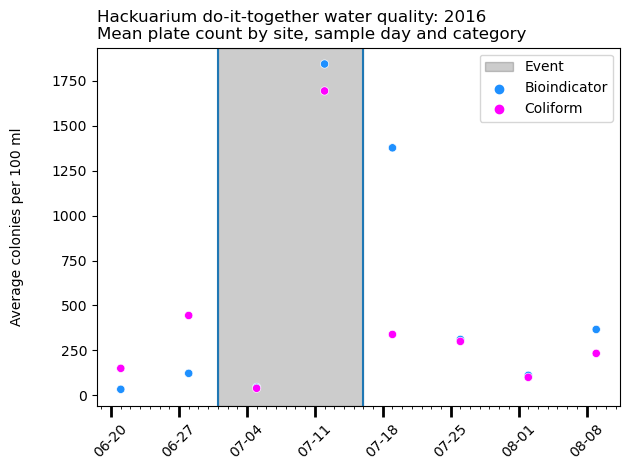

In [3]:
# mean per sample day and location
# set the index groups
groups = ["date", "label"]
figure_name = "mean_plate_count_no_rain"
title = "Mean plate count by site, sample day and category"
project = f"Hackuarium do-it-together water quality: {year[0]}"

scatterplot_date_label(rep_data, y,  groups, title, project, date_range_dt, date_format, label_colors, year, figure_name)

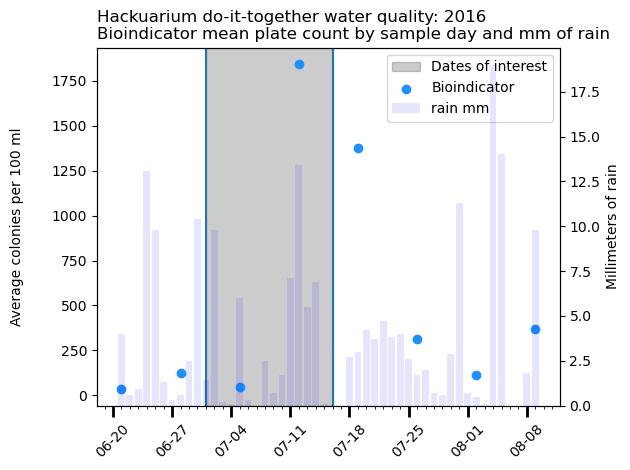

In [4]:
mean_sample_day_location_category = rep_data[rep_data.label == "Bioindicator"].groupby(groups, as_index=False)[y].mean()
figure_name = "mean_plate_count_bioindicator_rain"

title = "Bioindicator mean plate count by sample day and mm of rain"

scatterplot_date_label_rain(rep_data, rain_data, y, date_range_dt, date_format,  groups, "Bioindicator", title, project, label_colors, year, figure_name)

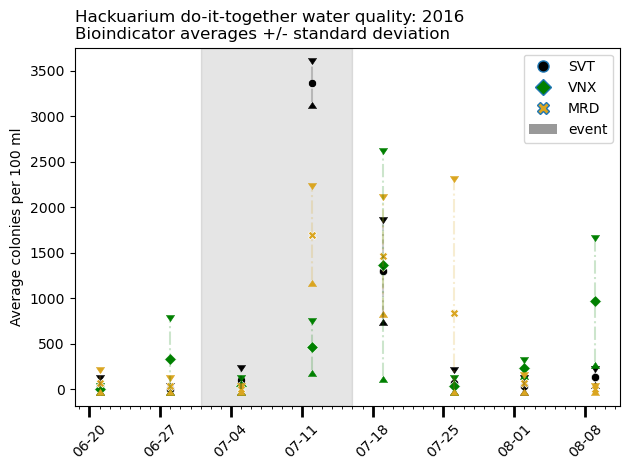

In [5]:
# bioindicator results
title = "Bioindicator averages +/- standard deviation"
figure_name3 = f"location_summary_bio_indicators_{year[0]}"
file_name = f"resources/charts/figure_three_{year[0]}.jpg"

by_location = location_summary(rep_data, y)

location_summary_charts(by_location, date_range_dt, date_format, locations, project, title, figure_name3, file_name)

## Are the plate counts for bioindicators durring the event greater than before or after the event?

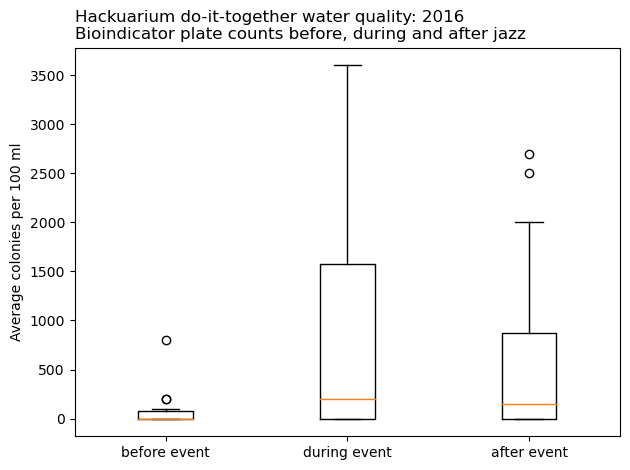

In [6]:
data = rep_data[rep_data.label == "Bioindicator"]

before = data[data["before event"] == True][y].values
during = data[data["event"] == True][y].values
after = data[data["after event"] == True ][y].values

d = [before, during, after]

title = "Bioindicator plate counts before, during and after jazz"
figure_name4 = f"before_during_after_{year[0]}"
file_name = f"resources/charts/figure_four_{year[0]}.jpg"


boxplots_before_during_after(d, project, title, figure_name4, file_name)

In [7]:
today = dt.datetime.now().date().strftime("%d/%m/%Y")
where = "Biel, CH"

my_block = f"""

This script updated {today} in {where}

\u2764\ufe0f __what you do everyday:__ *analyst at hammerdirt*
"""

md(my_block)



This script updated 09/10/2023 in Biel, CH

❤️ __what you do everyday:__ *analyst at hammerdirt*


In [8]:
%watermark --iversions -b -r

Git repo: https://github.com/hammerdirt-analyst/qualite-deau.git

Git branch: main

seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 2.0.3
numpy     : 1.25.2

